In [11]:
import cv2

#read in images 

img = cv2.imread('images/test/rb1.jpg')
img1 = cv2.imread('images/test/rb2.jpg')
img2 = cv2.imread('images/test/rb3.jpg')

# Output img with window name as 'image' 
cv2.imshow('image', img)  

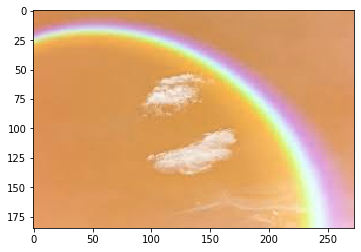

In [13]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 


  
# Output Images 
plt.imshow(img)


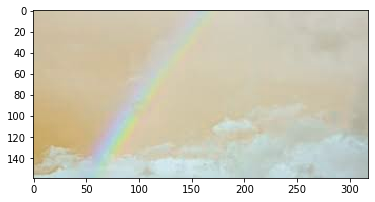

In [14]:
plt.imshow(img1)


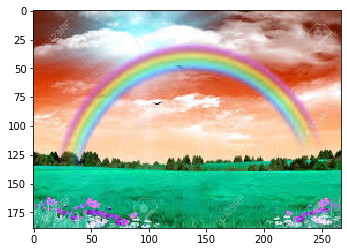

In [15]:
plt.imshow(img2)

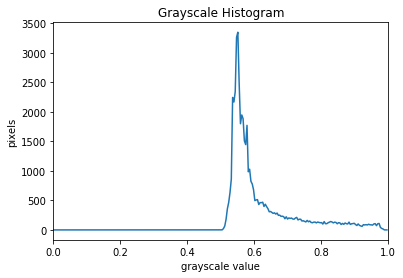

In [4]:
import sys
import numpy as np
import skimage.color
import skimage.io
import skimage.viewer
from matplotlib import pyplot as plt

# read image, based on command line filename argument;
# read the image as grayscale from the outset
image = skimage.io.imread('images/test/rb1.jpg', as_gray=True)

# display the image
#viewer = skimage.viewer.ImageViewer(image)
#viewer.show()

#creating histogram
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

#plotting histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

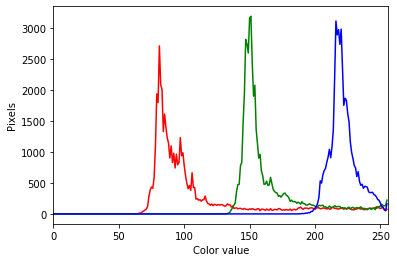

In [5]:
imagec = skimage.io.imread('images/test/rb1.jpg')

# display the image
#viewer = skimage.viewer.ImageViewer(image)
#viewer.show()

# tuple to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        imagec[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

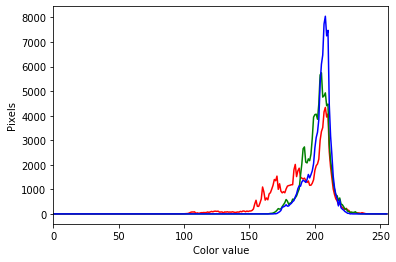

In [17]:
imagec = skimage.io.imread('images/test/rb2.jpg')

# display the image
#viewer = skimage.viewer.ImageViewer(image)
#viewer.show()

# tuple to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram1, bin_edges = np.histogram(
        imagec[:, :, channel_id], bins=256, range=(0, 256)
    )
    histogramd=histogram1+histogram
    plt.plot(bin_edges[0:-1], histogramd, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

In [26]:
import numpy as np 

def average_color(image_dict):
  '''
  A function to compute the average RGB value of an image.
  First, average over rows to obtain an average value per column.
  Then, average over the resulting values to obtain one average value per color 
  channel.
  
  :param image_dict:  The dictionary containing the loaded image 
  :return:            A 3-dimensional np array: 1 average per color channel
  '''
  numpymatrix = np.array(image_dict['original'])
  r = numpymatrix.mean(axis=1)
  a = r.mean(axis=0)
  return a # Change this line

In [27]:
# Extract the average color
avg_color = average_color(img).astype(int) # Cast for plotting

# Plot the test image next to the average color
fig = plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(test_image)
plt.title('Image: {}'.format(test_image_name)), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(Image.new("RGB", (test_image.size[0],test_image.size[1]),\
                  (avg_color[0], avg_color[1], avg_color[2])))
plt.title('The average color'), plt.xticks([]), plt.yticks([])
fig.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [1]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 5

print('reading image')
im = Image.open('images/test/rb2.jpg')
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

reading image
finding clusters
cluster centres:
 [[186.95422031 202.45948758 203.61100273]
 [123.03491272 177.03657523 203.37738986]
 [171.22610264 199.2262666  208.96294475]
 [210.88809654 212.02934723 194.25397696]
 [159.23349728 189.44214341 203.82966606]]
most frequent is [186.95422031 202.45948758 203.61100273] (#bacacb)


In [5]:
import gdown, zipfile, os

# The file id on the Drive
id='17ug45u9XK6-9CH3FPWI06qWdeJOEvPCH'
url='https://drive.google.com/uc?id={}'.format(id)
# The output zip file
output = 'Rainbow.zip'
# Now download the file
gdown.download(url,output,quiet=False)
# Unzip the files
with zipfile.ZipFile(os.path.abspath(output), 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('Rainbow')

Downloading...
From: https://drive.google.com/uc?id=17ug45u9XK6-9CH3FPWI06qWdeJOEvPCH
To: C:\Users\yanas\OneDrive\Masters\TMM\research\Rainbow.zip
100%|█████████████████████████████████████████████████████████████████████████████| 29.2k/29.2k [00:00<00:00, 29.3MB/s]


In [6]:
def get_all_filepaths(directory):
  '''
  A helper function to get all absolute file paths in a directory (recursively)
  :param directory:  The directory for which we want to get all file paths
  :return         :  A list of all absolute file paths as strings
  '''
  for dirpath,_,filenames in os.walk(directory):
    for f in sorted(filenames):
      yield os.path.abspath(os.path.join(dirpath, f))

In [7]:
import cv2
from PIL import Image

def load_sample_images(sample_pathnames):
  '''
  Initial loading the given images. 
  :param sample_pathnames: An array of image file paths that need to be opened
  :return:                 A dictionary of the form key:image_dictionary,
                           whereby image_dictionary itself is a dictionary 
                           containing the original image and the preprocessed
                           image for later steps
  '''
  sample_images = {}
  for filename in sample_pathnames:  # Loop through all images, load each file
    sample_images[filename] = {}
    sample_images[filename]['original'] = Image.open(filename)
    sample_images[filename]['cv2'] = cv2.imread(filename)
  return(sample_images)     

In [8]:
sample_pathnames = sorted(list(get_all_filepaths('rainbow')))
sample_images = load_sample_images(sample_pathnames)
print('We have loaded ' + str(len(sample_pathnames)) + ' images!')

We have loaded 5 images!


In [9]:
import time

def create_features(feature_funcs, image_dict):
  '''
  Loops over function names and calls each function and applies them on image
  :param feature_funcs:   A list of functions that extract individual features
  :param image_dict:       The loaded image dictionary to extract features from
  :return:                 The feature vector for the image
  '''
  feature_vector = []  
  for func in feature_funcs: # Subsequently apply each function
    feature_vector.extend(func(image_dict)) 
  return feature_vector  


def create_features_all_samples(feature_funcs,verbose=False):
  '''
  Loops over all sample images and calls create_features for each of them.
  :param feature_funcs:   A list of functions that extract individual features 
  :param verbose:         True if print statements of progress are desired
  :return:                All feature vectors combined in an array
  '''
  feature_vectors = []
  start = time.time()
  counter = 0 # Used to compute progress
  for sample_pathname in sample_pathnames:
    feature_vectors.append(create_features(feature_funcs, sample_images[sample_pathname]))
    counter = counter +1
    if verbose:
      if counter%25 == 0:
        print('Number of samples with features extracted: {}'.format(counter))  
        print("Time elapsed for last 25 samples: {}".format(time.time() - start))
        start = time.time()
  return feature_vectors

In [10]:
import numpy as np 

def average_color(image_dict):
  '''
  A function to compute the average RGB value of an image.
  First, average over rows to obtain an average value per column.
  Then, average over the resulting values to obtain one average value per color 
  channel.
  
  :param image_dict:  The dictionary containing the loaded image 
  :return:            A 3-dimensional np array: 1 average per color channel
  '''
  numpymatrix = np.array(image_dict['original'])
  r = numpymatrix.mean(axis=1)
  a = r.mean(axis=0)
  return a # Change this line

C:\Users\yanas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


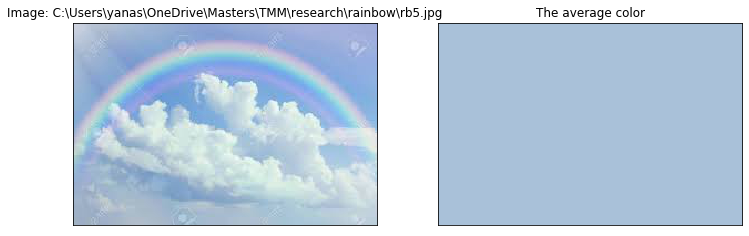

In [15]:
import matplotlib.pyplot as plt
# Extract the average color
test_image_name = sample_pathnames[4] # Change the index here to see more examples
test_image_dict = sample_images[test_image_name] 
test_image = test_image_dict['original']
avg_color = average_color(test_image_dict).astype(int) # Cast for plotting

# Plot the test image next to the average color
fig = plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(test_image)
plt.title('Image: {}'.format(test_image_name)), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(Image.new("RGB", (test_image.size[0],test_image.size[1]),\
                  (avg_color[0], avg_color[1], avg_color[2])))
plt.title('The average color'), plt.xticks([]), plt.yticks([])
fig.show()
